<a href="https://colab.research.google.com/github/NayeGarciaP/Mi-primer-repositorio-/blob/main/Redes%20Neuronales%20Convoluciones/Clasificaci%C3%B3n_de_digitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargar el conjunto de datos MNIST de dígitos escritos a mano

In [28]:
from sklearn.datasets import load_digits

digits = load_digits()

Exploramos el dataset

In [29]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [30]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [31]:
index = 0

In [32]:
image = digits.images[index]
label = digits.target[index]

In [33]:
print(image)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [34]:
image.shape

(8, 8)

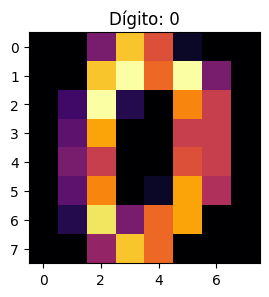

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))
plt.imshow(image, cmap=plt.cm.inferno)
plt.title(f'Dígito: {label}')
plt.show()

Dividir los datos en conjuntos de entrenamiento y prueba

In [36]:
digits.data.shape

(1797, 64)

In [37]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target,
    test_size=0.2, random_state=42
)

# One-hot encode the target variable
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [38]:
print(X_train.shape)
print(X_test.shape)

(1437, 64)
(360, 64)


Notamos como se ve el primer elemento de la variable X_train

In [39]:
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))
print(reshaped_tensor)

tf.Tensor(
[[ 0.  0.  3. 14.  1.  0.  0.  0.]
 [ 0.  0. 12. 12.  0.  0.  0.  0.]
 [ 0.  3. 16.  6.  0.  0.  0.  0.]
 [ 0.  5. 16.  2.  0.  0.  0.  0.]
 [ 0.  6. 16.  2.  5.  2.  0.  0.]
 [ 0.  4. 16.  2. 12. 15.  2.  0.]
 [ 0.  1. 14. 13.  2. 13. 11.  0.]
 [ 0.  0.  3. 11. 16. 13.  4.  0.]], shape=(8, 8), dtype=float64)


In [40]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))
# Redondeamos para tener una mejor visualizacion
reshaped_tensor =  tf.floor(reshaped_tensor * 100) / 100
print(reshaped_tensor)

tf.Tensor(
[[ 0.   -0.35 -0.47  0.5  -2.55 -1.04 -0.41 -0.14]
 [-0.07 -0.62  0.3   0.   -2.19 -1.36 -0.53 -0.14]
 [-0.05  0.12  1.08 -0.2  -1.17 -1.28 -0.56 -0.12]
 [-0.04  0.86  1.13 -1.17 -1.61 -1.29 -0.63 -0.05]
 [ 0.    1.09  1.34 -1.13 -0.91 -1.14 -0.82  0.  ]
 [-0.07  0.82  1.39 -0.83  0.69  1.17 -0.34 -0.1 ]
 [-0.04  0.15  1.14  0.64 -1.43  0.68  1.47 -0.22]
 [-0.03 -0.31 -0.5  -0.25  0.84  1.05  0.45 -0.2 ]], shape=(8, 8), dtype=float64)


In [42]:
# Redimensionar el tensor a la forma (total, 8, 8)
X_train = tf.reshape(X_train, (X_train.shape[0], 8, 8))
X_test = tf.reshape(X_test, (X_test.shape[0], 8, 8))

In [43]:
X_train[0]

<tf.Tensor: shape=(8, 8), dtype=float64, numpy=
array([[ 0.        , -0.34169755, -0.46336049,  0.50836462, -2.54590607,
        -1.03722581, -0.40623424, -0.13101874],
       [-0.06103492, -0.61725402,  0.30881425,  0.00348328, -2.18152552,
        -1.35608548, -0.52465505, -0.13336005],
       [-0.04991522,  0.12851911,  1.08857992, -0.19343737, -1.16010978,
        -1.27307852, -0.552537  , -0.11409248],
       [-0.03733267,  0.86365151,  1.13744682, -1.16195968, -1.60835913,
        -1.28296188, -0.62554872, -0.04573894],
       [ 0.        ,  1.09151514,  1.34318585, -1.12678131, -0.90106555,
        -1.13185292, -0.81347241,  0.        ],
       [-0.06519029,  0.82828946,  1.39981472, -0.82540858,  0.69177178,
         1.17865528, -0.33784246, -0.09403434],
       [-0.03963009,  0.15955797,  1.14244768,  0.64507954, -1.42282149,
         0.68917912,  1.47990131, -0.21608405],
       [-0.02638899, -0.30677646, -0.49962244, -0.246272  ,  0.84804385,
         1.05270303,  0.45952251

Red neuronal convolucional

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Crear el modelo de CNN
model = Sequential([
    Conv2D(32, kernel_size=(3, 3),
        activation='relu',
        input_shape=(8, 8, 1)
    ),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compilar el modelo

Crear un optimizador Adam con una tasa de aprendizaje del 0.001

In [45]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

In [46]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Entrenar el modelo

In [47]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4435 - loss: 1.9414 - val_accuracy: 0.8681 - val_loss: 0.8591
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8993 - loss: 0.6558 - val_accuracy: 0.9132 - val_loss: 0.3512
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9623 - loss: 0.2441 - val_accuracy: 0.9201 - val_loss: 0.2503
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9744 - loss: 0.1503 - val_accuracy: 0.9514 - val_loss: 0.2070
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9795 - loss: 0.1162 - val_accuracy: 0.9549 - val_loss: 0.1638
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9882 - loss: 0.0715 - val_accuracy: 0.9653 - val_loss: 0.1402
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9874 - loss: 0.0638 - val_accuracy: 0.9653 - val_loss: 0.1270
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9947 - loss: 0.0459 - val_accuracy: 0.9549 - val_loss

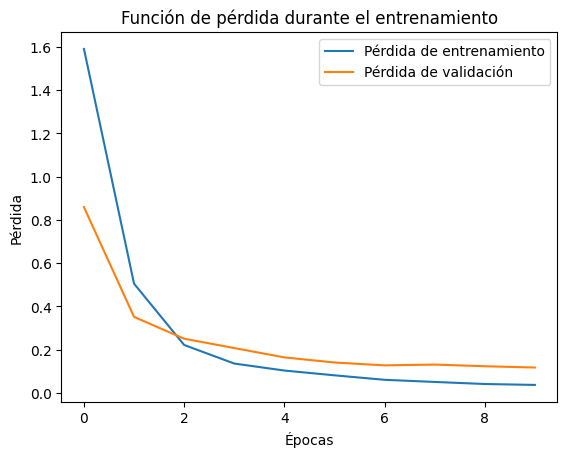

In [48]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()

In [49]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9798 - loss: 0.0559  
Loss: 0.05821308493614197, Accuracy: 0.9833333492279053


Matriz de confusión y la sensibilidad (recall)

In [50]:
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert y_test back to multiclass format
y_test_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
sensitivity = recall_score(y_test_classes, y_pred_classes, average=None)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


Visualizar la matriz de confusión y mostrar la sensibilidad para cada clase

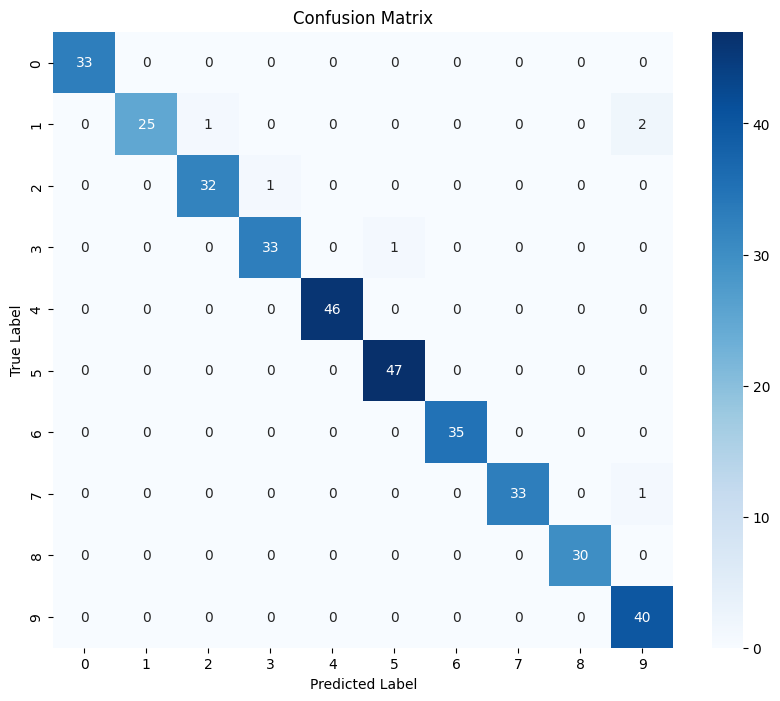

Sensitivity (Recall) for each class:
Class 0: 1.0
Class 1: 0.8928571428571429
Class 2: 0.9696969696969697
Class 3: 0.9705882352941176
Class 4: 1.0
Class 5: 1.0
Class 6: 1.0
Class 7: 0.9705882352941176
Class 8: 1.0
Class 9: 1.0


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la matriz de confusión como una imagen de colores
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Mostrar la sensibilidad (recall) para cada clase
print('Sensitivity (Recall) for each class:')
for i in range(10):
    print(f'Class {i}: {sensitivity[i]}')

Bonus (Predecir una imagen distinta al conjunto de datos)

In [52]:
from google.colab import files
uploaded = files.upload()  # selecciona mi_numero_NUEVO.png

# muestra los archivos subidos
for name, content in uploaded.items():
    print(name, len(content), "bytes")


Saving mi_numero.png to mi_numero (1).png
mi_numero (1).png 18622134 bytes


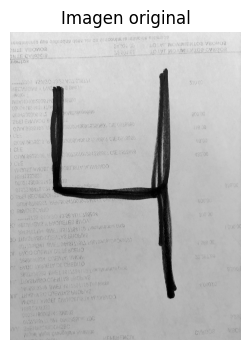

In [54]:
from PIL import Image
import matplotlib.pyplot as plt

# Cambia por el nombre de tu archivo
ruta = "/content/mi_numero.png"

# Escala de grises ("L")
img = Image.open(ruta).convert("L")

# mostrar la imagen
plt.figure(figsize=(4, 4))
plt.imshow(img, cmap="gray")
plt.title("Imagen original")
plt.axis("off")
plt.show()

Redimensionar

Redimensionar la imagen a 8x8 pixeles, sin mantener la proporción

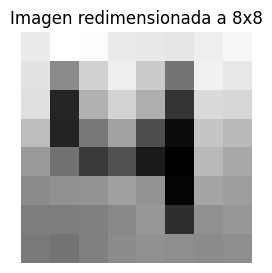

In [55]:
import matplotlib.pyplot as plt

# redimensionar a 8x8
img_resized = img.resize((8, 8), Image.Resampling.LANCZOS)

# mostrar imagen
plt.figure(figsize=(3, 3))
plt.imshow(img_resized, cmap="gray")
plt.title("Imagen redimensionada a 8x8")
plt.axis("off")
plt.show()

# opcional, guardamos la imagen si es necesario
img_resized.save("imagen_8x8.png")

Se tiene que ajustar la imagen de forma similar a la base de datos utilizada MNIST.

Primero rescalamos los valores de la imagen por los valores utilizados por las imagenes de la base de datos MNIST, es decir, la imagen debe tener valores de entre 0 y 16.

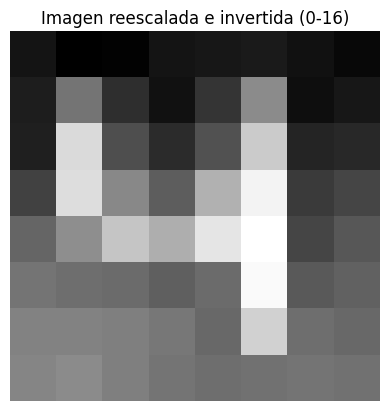

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# reescalar de 0-255 a 0-16 e invertir (fondo negro = 0)
img_array = np.array(img_resized).astype("float32")
img_array = 16 - (img_array / 255 * 16)

# mostrar imagen
plt.imshow(img_array, cmap="gray")
plt.title("Imagen reescalada e invertida (0-16)")
plt.axis("off")
plt.show()

Ahora debe estandarizar la imagen

In [57]:
from sklearn.preprocessing import StandardScaler

# normalizar
scaler = StandardScaler()
img_flat = img_array
img_scaled = scaler.fit_transform(img_flat)

# Dar forma (1,8,8) que es el input del modelo
img_tensor = img_scaled.reshape(1, 8, 8)

Evaluación

In [58]:
pred = model.predict(img_tensor)
digit = np.argmax(pred)
print("Predicción:", digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicción: 4


El código va a entrenar una red neuronal convolucional (CNN) para reconocer dígitos escritos del 0 al 9, utilizando el conjunto de datos MNIST.
Primero, se carga el dataset usando load_digits() de sklearn.datasets.
Se visualiza una imagen para entender la estructura de los datos.
Las imágenes se normalizan usando StandardScaler para ser procesadas por la CNN.
Se define un modelo secuencial con Sequential
Dense (128 neuronas): aprende combinaciones complejas de características.
Dense (10 neuronas, softmax): capa de salida que predice la probabilidad de cada dígito (0–9).
El modelo se compila con el optimizador Adam, función de pérdida categorical_crossentropy y métrica accuracy.
Se entrena con model.fit() durante 10 épocas
Para la evaluación, se calcula la pérdida y precisión en el conjunto de prueba
Se generan predicciones y se calcula la matriz de confusión y la sensibilidad (recall) por clase con confusion_matrix y recall_score.
El código incluye un bonus para predecir un dígito a partir de una imagen externa (mi_numero.png). La imagen se convierte a escala de grises.
El model.predict() devuelve la clase más probable, mostrando el dígito predicho.

